# Linear Regression

In [48]:
import pandas as pd
import seaborn as sn
df= pd.read_csv('Admission_Prediction.csv')

In [49]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [50]:
df.drop(columns=['Serial No.'],inplace=True)

In [51]:
df.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [53]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [57]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)

In [54]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)

array([[<AxesSubplot: title={'center': 'GRE Score'}>,
        <AxesSubplot: title={'center': 'TOEFL Score'}>,
        <AxesSubplot: title={'center': 'University Rating'}>],
       [<AxesSubplot: title={'center': 'SOP'}>,
        <AxesSubplot: title={'center': 'LOR'}>,
        <AxesSubplot: title={'center': 'CGPA'}>],
       [<AxesSubplot: title={'center': 'Research'}>,
        <AxesSubplot: title={'center': 'Chance of Admit'}>,
        <AxesSubplot: >]], dtype=object)

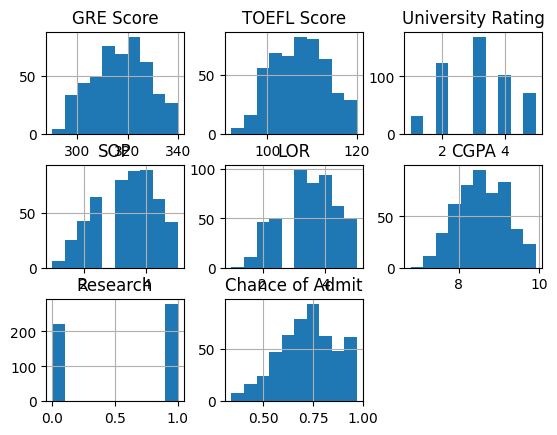

In [55]:
df.hist()

In [58]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


# CASE 1: without scaling the data (linear regression)

In [60]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
model=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)
model.fit(x_train,y_train)
# model.coef_
df['predict']=model.predict(x.values)

In [62]:
model.score(x_train,y_train)

0.8415250484247909

In [63]:
model.score(x_test,y_test)

0.7534898831471069

In [64]:
len(x_train)

375

In [65]:
len(y_train)

375

In [66]:
len(x_test)

125

In [67]:
len(y_test)

125

In [68]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [69]:
adj_r2(x_train,y_train)

0.8385023654247188

In [70]:
adj_r2(x_test,y_test)

0.7487880553052261

In [71]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predict
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92,0.956552
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76,0.806160
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72,0.650073
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80,0.744834
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65,0.637029
...,...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87,0.840989
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96,0.995957
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93,0.945631
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73,0.704119


In [72]:
r2_score(df['Chance of Admit'],df['predict']) #500 rows are taken into consideration

0.8196118757837627

In [73]:
import pickle
with open('withoutscale','wb') as f:
    pickle.dump(model,f)

In [74]:
with open('withoutscale','rb') as f:
    ob=pickle.load(f)

In [75]:
ob.predict(x_train)

array([0.51961845, 0.92641531, 0.65268603, 0.45367794, 0.7261045 ,
       0.56157264, 0.64399746, 0.6717782 , 0.88462116, 0.5386425 ,
       0.86532148, 0.79615794, 0.87876975, 0.65391022, 0.82981008,
       0.83628496, 0.59987779, 0.67211946, 0.71566626, 0.62522037,
       0.58785288, 0.84607886, 0.91014103, 0.47815708, 0.7278715 ,
       0.65237293, 0.82712003, 0.6359292 , 0.72587529, 0.75234061,
       0.51252159, 0.94506612, 0.6755415 , 0.61353761, 0.69275363,
       0.63490871, 0.79588503, 0.79721814, 0.60981385, 0.70015986,
       0.80420222, 0.76643529, 0.67653552, 0.69393134, 0.57781969,
       0.85616644, 0.57673715, 0.69877244, 0.78172433, 0.55107767,
       0.69755156, 0.71843697, 0.53309299, 0.68272674, 0.71027383,
       0.64046325, 0.69857504, 0.53228787, 0.50208129, 0.89510618,
       0.56678189, 0.51766808, 0.81335433, 0.84772852, 0.70645241,
       0.59739162, 0.79918831, 0.6033345 , 0.59393044, 0.71228864,
       0.62009763, 0.74220017, 0.65059942, 0.54180481, 0.69289

In [76]:
model.coef_

array([0.00210724, 0.0018642 , 0.00382886, 0.00144171, 0.0160296 ,
       0.13047543, 0.01990266])

In [77]:
model.intercept_

-1.3464908093891008

In [78]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,predict
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92,0.956552
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76,0.806160
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72,0.650073
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80,0.744834
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65,0.637029
...,...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87,0.840989
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96,0.995957
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93,0.945631
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73,0.704119


In [79]:
x_test

array([[295.        ,  93.        ,   1.        ,   2.        ,
          2.        ,   7.2       ,   0.        ],
       [324.        , 110.        ,   4.        ,   4.5       ,
          4.        ,   9.15      ,   1.        ],
       [308.        , 106.        ,   3.        ,   3.        ,
          3.        ,   8.24      ,   0.        ],
       [328.        , 108.        ,   4.        ,   4.5       ,
          4.        ,   9.18      ,   1.        ],
       [338.        , 120.        ,   4.        ,   5.        ,
          5.        ,   9.66      ,   1.        ],
       [317.        , 100.        ,   2.        ,   3.        ,
          2.5       ,   8.57      ,   0.        ],
       [313.        , 102.        ,   3.        ,   2.        ,
          3.        ,   8.27      ,   0.        ],
       [295.        ,  99.        ,   2.        ,   2.5       ,
          3.        ,   7.65      ,   0.        ],
       [316.        , 101.        ,   2.        ,   2.5       ,
          2.    

In [82]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit', 'predict'],
      dtype='object')

In [87]:
test_data=pd.DataFrame(x_test,columns=[df.columns[0:7]])
test_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,295.0,93.0,1.0,2.0,2.0,7.20,0.0
1,324.0,110.0,4.0,4.5,4.0,9.15,1.0
2,308.0,106.0,3.0,3.0,3.0,8.24,0.0
3,328.0,108.0,4.0,4.5,4.0,9.18,1.0
4,338.0,120.0,4.0,5.0,5.0,9.66,1.0
...,...,...,...,...,...,...,...
120,331.0,115.0,5.0,4.0,3.5,9.44,1.0
121,327.0,118.0,4.0,5.0,5.0,9.67,1.0
122,313.0,94.0,2.0,2.5,1.5,8.13,0.0
123,321.0,111.0,4.0,4.0,4.0,8.97,1.0


In [ ]:
test_data.to_csv('test.csv')

# CASE 2: without scaling the data

In [29]:
df.drop(columns='predict',inplace=True)

In [30]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1,0.87
496,337.000000,117.0,5.0,5.0,5.0,9.87,1,0.96
497,330.000000,120.0,5.0,4.5,5.0,9.56,1,0.93
498,312.000000,103.0,4.0,4.0,5.0,8.43,0,0.73


In [31]:
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
ind=df.columns[0:len(df.columns)-1]
dep=df.columns[-1]
x = df[ind]
y = df[dep]
X=x.values
Y=y.values
scale=StandardScaler()
scale_X=scale.fit_transform(X)
model1=LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(scale_X,Y,test_size = 0.25,random_state=355)
model1.fit(x_train,y_train)
transformed=scale.transform(x.values)
# model.coef_
model1.predict(transformed)

array([0.95655226, 0.80616023, 0.65007334, 0.74483433, 0.63702902,
       0.87554604, 0.70286299, 0.5976811 , 0.55460481, 0.72219204,
       0.7325153 , 0.83690056, 0.82981008, 0.63267862, 0.64113122,
       0.65047683, 0.72145279, 0.65237293, 0.74220017, 0.65581446,
       0.60896757, 0.69857504, 0.92685189, 0.92641531, 0.96295894,
       0.96390748, 0.76515832, 0.51252159, 0.42671078, 0.48566015,
       0.6033345 , 0.7188105 , 0.92387808, 0.94398663, 0.96341774,
       0.85966612, 0.69171691, 0.53646092, 0.50061588, 0.57595507,
       0.6359292 , 0.65627586, 0.68481036, 0.8444729 , 0.8872468 ,
       0.82714574, 0.89769393, 0.94506612, 0.80628668, 0.74915879,
       0.68584035, 0.62357758, 0.70645241, 0.68295594, 0.65282188,
       0.58840058, 0.53752307, 0.51838375, 0.41758638, 0.62828468,
       0.60798962, 0.62395745, 0.63972461, 0.70721701, 0.75234061,
       0.78745912, 0.79588503, 0.73488476, 0.83034706, 0.86004672,
       0.92473738, 0.97017664, 0.89625642, 0.80183888, 0.76997

In [32]:
model1.score(x_train,y_train)

0.8415250484247909

In [33]:
model1.score(x_test,y_test)

0.7534898831471066

In [34]:
len(x_train)

375

In [35]:
len(x_train)

375

In [36]:
len(x_test)

125

In [37]:
len(y_test)

125

In [38]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = model1.score(x,y)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [39]:
adj_r2(x_train,y_train)

0.8385023654247188

In [40]:
adj_r2(x_test,y_test)

0.7487880553052259

In [41]:
with open('scale','wb') as f:
    pickle.dump(scale,f)

In [42]:
with open('scale','rb') as f:
    scale=pickle.load(f)

In [43]:
with open('withscale','wb') as f:
    pickle.dump(model1,f)

In [44]:
with open('withscale','rb') as f:
    ob=pickle.load(f)

In [45]:
val=scale.transform([[25,6,5,6,8,2,1]])

In [46]:
model1.predict(val)

array([-0.84573964])